# TRKD HTTP JSON with Python Example: Time-Series Interday

## Overview
The [Thomson Reuters Knowledge Direct (TRKD) API](https://developers.thomsonreuters.com/thomson-reuters-knowledge-direct-trkd) integrates into your website, trading platform, company intranet/extranet, advisory portal and mobile applications to provide up-to-date financial market data, news and analytics and powerful investment tools.

TRKD offers a wide range of Refinitiv' information and services delivered in a request-response scenario via web services using today's industry standard protocols (SOAP/XML and REST/JSON). Connectivity can be via HTTP and HTTPS, over the Internet or Delivery Direct. All data are snapshot (non-streaming) data.

This is an example project that shows how to implement TRKD HTTP JSON client with Python programming lanugage in Jupyter Notebook.

## Time-Series Interday Interday Introduction
TRKD Time-Series Interday requests let you retrieve historical time series prices on an instrument, summarized in daily, weekly, monthly, quarterly, or annual periods. For each period, details such as the opening price, closing price, highest and lowest prices, Closing Yield value of the period, and Bid price and Ask price of the stock are retrieved. Historical interday time series prices for instruments are available back to 1981.


*Note*: A maximum of 5000 points is retrievable in a single call to the Time Series service. Any data over the 5000 record limit is
truncated. If you do need a great number of records (more than 5000 records), Refinitiv recommends that you break
up your query into several requests and then combine the responses together.

### TRKD JSON application implementation process
The JSON application requires the following steps to consume data from TRKD API services
1. Authentication with TRKD Authentication service to get an authen token
2. Send a request message with the required input information and authen token to the interested TRKD service

In [1]:
# #uncomment if you do not have requests installed

# #Install required packages in a current Jupyter kernal
# import sys
# !{sys.executable} -m pip install requests
# !{sys.executable} -m pip install matplotlib 
# !{sys.executable} -m pip install seaborn
# !{sys.executable} -m pip install pandas

In [2]:
# import requires libraries for HTTP Request and JSON Operation
import requests
import json

In [3]:
# HTTP operations function
def doSendRequest(url, requestMsg, headers):
    result = None
    try:
        result = requests.post(url, data=json.dumps(requestMsg), headers=headers)
    except requests.exceptions.RequestException as e:
        print('Exception!!!')
        print(e)
    return result

In [19]:
# Input your TRKD credentials here

username = ''
password = ''
appid = ''

In [5]:
# Authentication parameters
token = None
expire = None

In [6]:
# TRKD Authenticaion request message

authenMsg = {'CreateServiceToken_Request_1': {'ApplicationID': appid, 'Username': username, 'Password': password}}

# TRKD Authentication service URL

authenURL = (
    'https://api.trkd.thomsonreuters.com/api/'
    'TokenManagement/TokenManagement.svc/REST/'
    'Anonymous/TokenManagement_1/CreateServiceToken_1'
)

# TRKD Authentication headers

authen_headers = {'content-type': 'application/json;charset=utf-8'}

In [7]:
# Send Authentication request

authenResult = doSendRequest(authenURL, authenMsg, authen_headers)

In [8]:
if authenResult and authenResult.status_code == 200:
    print('Authen success')
    # print('JSON resonse: %s' % (json.dumps(authenResult.json(),sort_keys=True, indent=2, separators=(',', ':'))))
    token = authenResult.json()['CreateServiceToken_Response_1']['Token']
    expire = authenResult.json()['CreateServiceToken_Response_1']['Expiration']
elif authenResult.status_code is not 200:
    print('Authen fail with status code %s' % authenResult.status_code)
    if authenResult.status_code == 500:
        print('Error: %s' % (json.dumps(authenResult.json(), sort_keys=True, indent=2, separators=(',', ':'))))

Authen success


#### TRKD Time-Series: Interday Service detail
##### TRKD Service Token URL and Header

TRKD Time Series provides Interday data for developers via GetInterdayTimeSeries_4 operation. The endponint of GetInterdayTimeSeries_4 operaion is the following URL:
[http://api.trkd.thomsonreuters.com/api/TimeSeries/TimeSeries.svc/REST/TimeSeries_1/GetInterdayTimeSeries_4](http://api.trkd.thomsonreuters.com/api/TimeSeries/TimeSeries.svc/REST/TimeSeries_1/GetInterdayTimeSeries_4)

- Header: 
  - Content-type = application/json
  - X-Trkd-Auth-ApplicationID = Application ID
  - X-Trkd-Auth-Token = service Token
- Method: Post

##### HTTP Request Post Body
The GetInterdayTimeSeries_4 operation requires the following properties in a request message's body
- Symbol: A RIC of the instrument for the interday prices you want to retrieve
- StartTime: Start date and time criteria of the search. The format of the Start time should be:
yyyy-mm-ddThh:mm:ss
- EndTime: End date and time criteria of the search. The format of the Start time should be:
yyyy-mm-ddThh:mm:ss
- Interval: The interval between samples. The choices are "DAILY", "WEEKLY", "MONTHLY", "QUARTERLY", "ANNUAL" string value.

You can find more detail regarding optional properties (such as in "TrimResponse" or "Field") in [TRKD API Development Guide document](https://developers.refinitiv.com/thomson-reuters-knowledge-direct-trkd/thomson-reuters-knowledge-direct-api-trkd-api/docs).

The request message structure is following
```
{
    "GetInterdayTimeSeries_Request_4":{
      "Symbol": <application id>,
      "StartTime": <username>,
      "EndTime": <password>,
      "Interval": "DAILY"
   }
}
```
*Note*: Please pay attention that maximum "EndDate" interval is >=2038. If you specify a greater "EndDate" interval, you receive a blank response.

In [9]:
# Time-Series Interday parameters

ricName = 'IBM.N'
#change your fields (support these 'OPEN','HIGH','LOW','CLOSE','CLOSEYIELD','VOLUME','BID','ASK' fields only)
fields = ['OPEN','HIGH','LOW','CLOSE'] 

startTime = '2015-09-22T00:00:00' #change your StartTime
endtime = '2016-09-22T23:59:00'  #change your EndTime

# change your interval between 'DAILY', 'WEEKLY', 'MONTHLY', 'QUARTERLY' and 'ANNUAL'
interval = 'DAILY' 

In [10]:
# TRKD Time-Series Interday Service URL
interdayURL = 'http://api.trkd.thomsonreuters.com/api/TimeSeries/TimeSeries.svc/REST/TimeSeries_1/GetInterdayTimeSeries_4'

# TRKD Time-Series Interday request message headers
interday_headers = {
    'content-type': 'application/json;charset=utf-8' ,
    'X-Trkd-Auth-ApplicationID': appid, 
    'X-Trkd-Auth-Token' : token
}

# TRKD Time-Series Interday request message 
interdayRequestMsg = {
        'GetInterdayTimeSeries_Request_4':{
            'Field': fields,
            'TrimResponse': False,
            'Symbol': ricName,
            'StartTime':startTime,
            'EndTime':endtime,  
            'Interval':interval,
            'MetaField': ['NAME','QOS','CCY','TZ','TZOFFSET','NAME_LL']
        }
    }

In [11]:
# Send Time-Series: Interday request

interdayResult = doSendRequest(interdayURL, interdayRequestMsg, interday_headers)

In [12]:
if interdayResult and interdayResult.status_code == 200:
        print('Time Series Interday response message: ')
        print(json.dumps(interdayResult.json(), sort_keys=True, indent=2, separators=(',', ':')))

Time Series Interday response message: 
{
  "GetInterdayTimeSeries_Response_4":{
    "MetaFields":{
      "CCY":"USD",
      "NAME":"INTL BUS MACHINE",
      "QOS":"RT",
      "TZ":"NYC",
      "TZOFFSET":-240
    },
    "Row":[
      {
        "CLOSE":144.43,
        "HIGH":145.02,
        "LOW":143.77,
        "OPEN":144.82,
        "TIMESTAMP":"2015-09-22T00:00:00+00:00"
      },
      {
        "CLOSE":143.66,
        "HIGH":144.538,
        "LOW":142.75,
        "OPEN":144.21,
        "TIMESTAMP":"2015-09-23T00:00:00+00:00"
      },
      {
        "CLOSE":144.41,
        "HIGH":145.07,
        "LOW":141.95,
        "OPEN":142.6,
        "TIMESTAMP":"2015-09-24T00:00:00+00:00"
      },
      {
        "CLOSE":145.42,
        "HIGH":146.27,
        "LOW":144.56,
        "OPEN":145.55,
        "TIMESTAMP":"2015-09-25T00:00:00+00:00"
      },
      {
        "CLOSE":142.52,
        "HIGH":145.36,
        "LOW":142.47,
        "OPEN":144.33,
        "TIMESTAMP":"2015-09-28T00:00:00+00

In [13]:
# import requires Pandas and matplotlib libraries
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

In [14]:
interday_data = interdayResult.json()['GetInterdayTimeSeries_Response_4']['Row']

In [15]:
columns = [key for key in interday_data[0]]

In [16]:
df = pd.DataFrame(interday_data, columns = columns)

In [17]:
df['TIMESTAMP']= df['TIMESTAMP'].str.split('T00').str[0]
df.sort_values('TIMESTAMP',ascending=True,inplace=True)

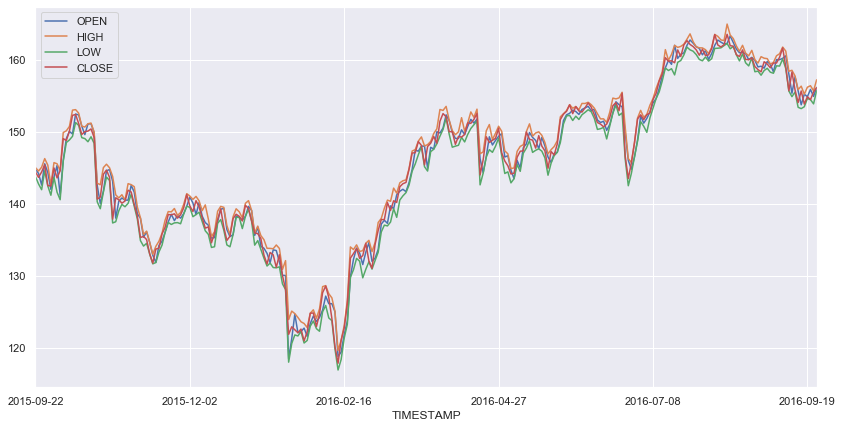

In [18]:
df.plot(x = 'TIMESTAMP',y = fields,figsize=(14,7))

## References
For further details, please check out the following resources:
* [Thomson Reuters Knowledge Direct API page](https://developers.refinitiv.com/thomson-reuters-knowledge-direct-trkd) on the [Refinitiv Developer Community](https://developers.refinitiv.com/) web site.
* [Thomson Reuters Knowledge Direct API Catalog](https://www.trkd.thomsonreuters.com/SupportSite/RequestBuilder/requestbuilder.aspx) web site.
* [TRKD Tutorial: Time-Series - Interday](https://developers.refinitiv.com/thomson-reuters-knowledge-direct-trkd/thomson-reuters-knowledge-direct-api-trkd-api/learning?content=68082&type=learning_material_item) page.

For any question related to this tutorial or TRKD API, please use the Developer Community [Q&A Forum](https://community.developers.refinitiv.com/spaces/51/view.html).